# Getting the files

In [2]:
! wget -O model_architecture.json https://www.kaggleusercontent.com/kf/16355492/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0JDLUhTMjU2In0..kUV38DiC7vJ-cenZvyIsHg.8YMwcgkQRnDX222oFSJJfAcZ4MaUX9fEZw1Gi6lK4PLKELdtiqVoh9DW9ntQkW__K5vLs0WHifOOvui09Bz2XCCSxuqq5nfMo_kWNJ5-xn7va3267Qu_VQdWcGTnF-ravFGj_9GPfBagu55cbiRRcQ.a2j5J9hgvbnVB5pSoFci8Q/model_architecture.json

--2019-06-27 12:33:10--  https://www.kaggleusercontent.com/kf/16355492/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0JDLUhTMjU2In0..kUV38DiC7vJ-cenZvyIsHg.8YMwcgkQRnDX222oFSJJfAcZ4MaUX9fEZw1Gi6lK4PLKELdtiqVoh9DW9ntQkW__K5vLs0WHifOOvui09Bz2XCCSxuqq5nfMo_kWNJ5-xn7va3267Qu_VQdWcGTnF-ravFGj_9GPfBagu55cbiRRcQ.a2j5J9hgvbnVB5pSoFci8Q/model_architecture.json
Resolving www.kaggleusercontent.com (www.kaggleusercontent.com)... 35.190.26.106
Connecting to www.kaggleusercontent.com (www.kaggleusercontent.com)|35.190.26.106|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5637 (5.5K) [application/json]
Saving to: ‘model_architecture.json’

model_architecture. 100%[===================>]   5.50K  --.-KB/s    in 0.006s  

2019-06-27 12:33:10 (848 KB/s) - ‘model_architecture.json’ saved [5637/5637]



In [3]:
!wget -O model_weights.h5 https://www.kaggleusercontent.com/kf/16355492/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0JDLUhTMjU2In0..kUV38DiC7vJ-cenZvyIsHg.8YMwcgkQRnDX222oFSJJfAcZ4MaUX9fEZw1Gi6lK4PLKELdtiqVoh9DW9ntQkW__K5vLs0WHifOOvui09Bz2XCCSxuqq5nfMo_kWNJ5-xn7va3267Qu_VQdWcGTnF-ravFGj_9GPfBagu55cbiRRcQ.a2j5J9hgvbnVB5pSoFci8Q/model_weights.h5

--2019-06-27 12:33:11--  https://www.kaggleusercontent.com/kf/16355492/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0JDLUhTMjU2In0..kUV38DiC7vJ-cenZvyIsHg.8YMwcgkQRnDX222oFSJJfAcZ4MaUX9fEZw1Gi6lK4PLKELdtiqVoh9DW9ntQkW__K5vLs0WHifOOvui09Bz2XCCSxuqq5nfMo_kWNJ5-xn7va3267Qu_VQdWcGTnF-ravFGj_9GPfBagu55cbiRRcQ.a2j5J9hgvbnVB5pSoFci8Q/model_weights.h5
Resolving www.kaggleusercontent.com (www.kaggleusercontent.com)... 35.190.26.106
Connecting to www.kaggleusercontent.com (www.kaggleusercontent.com)|35.190.26.106|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 54580672 (52M) [application/octet-stream]
Saving to: ‘model_weights.h5’

model_weights.h5    100%[===================>]  52.05M  26.5MB/s    in 2.0s    

2019-06-27 12:33:13 (26.5 MB/s) - ‘model_weights.h5’ saved [54580672/54580672]



---

# Model Reconstruction

In [4]:
from keras.models import model_from_json

Using TensorFlow backend.


In [5]:
# Model reconstruction from JSON file
with open('model_architecture.json', 'r') as f:
    model = model_from_json(f.read())

In [6]:
# Load weights into the new model
model.load_weights('model_weights.h5')

---

# Model Architecture 

In [7]:
model.layers

In [8]:
model.input

<tf.Tensor 'conv2d_1_input:0' shape=(?, 256, 256, 3) dtype=float32>

In [9]:
model.outputs

[<tf.Tensor 'dense_4/Softmax:0' shape=(?, 10) dtype=float32>]

In [10]:
model.get_config()

{'name': 'sequential_1',
 'layers': [{'class_name': 'Conv2D',
   'config': {'name': 'conv2d_1',
    'trainable': True,
    'batch_input_shape': (None, 256, 256, 3),
    'dtype': 'float32',
    'filters': 64,
    'kernel_size': (3, 3),
    'strides': (1, 1),
    'padding': 'valid',
    'data_format': 'channels_last',
    'dilation_rate': (1, 1),
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'VarianceScaling',
     'config': {'scale': 1.0,
      'mode': 'fan_avg',
      'distribution': 'uniform',
      'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'MaxPooling2D',
   'config': {'name': 'max_pooling2d_1',
    'trainable': True,
    'pool_size': (2, 2),
    'padding': 'valid',
    'strides': (2, 2),
    'data_format': 'channels_last'}},
  {'cla

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 254, 254, 64)      1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 127, 127, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 125, 125, 64)      36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 60, 60, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 30, 30, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 128)       147584    
__________

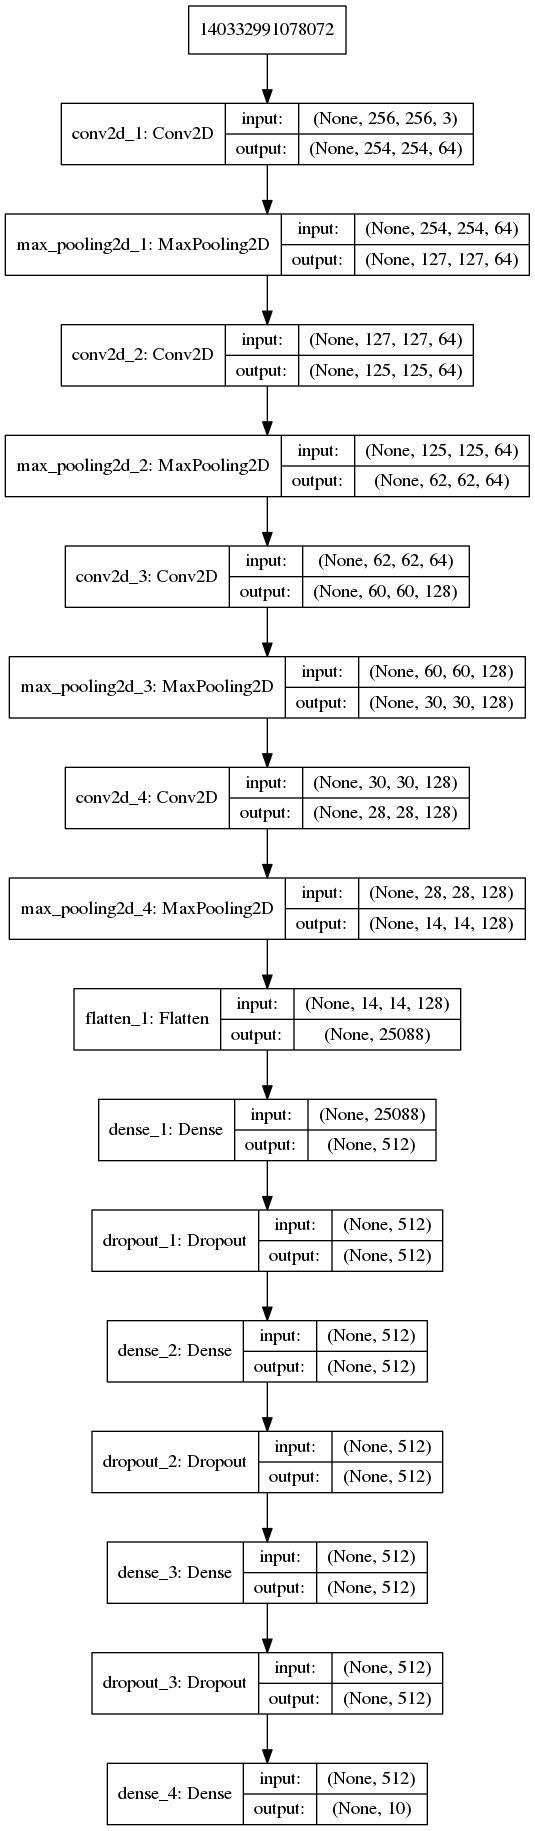

In [12]:
from keras.utils import plot_model
from IPython.display import Image
plot_model(model, to_file='model_diagram.png', show_shapes=True, show_layer_names=True)
Image("model_diagram.png")

---

# Gettin New Image 

In [13]:
import matplotlib.pyplot as plt
d1 = d2 = 256

In [14]:
#Indices
'''
cane  -   Dog
cavallo  -  Horse
elefante  -  Elephant
farfalla  -  Butterfly
gallina  -  Hen
gatto  -  Cat
mucca  -  Cow
pecora  -  Sheep
ragno  -  Spider
scoiattolo  -  Squirrel
'''

'\ncane  -   Dog\ncavallo  -  Horse\nelefante  -  Elephant\nfarfalla  -  Butterfly\ngallina  -  Hen\ngatto  -  Cat\nmucca  -  Cow\npecora  -  Sheep\nragno  -  Spider\nscoiattolo  -  Squirrel\n'

In [15]:
#Query Image
q = '../input/animals/raw-img/farfalla/OIP-yaTVwgaziAC5tbx7KUaW0wHaFh.jpeg'

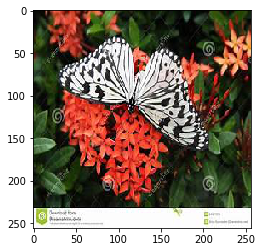

In [16]:
#single prediction
import numpy as np
from keras.preprocessing import image

#loading the image
test_image = image.load_img(q, target_size=(d1,d2))
plt.imshow(test_image)

In [17]:
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
test_image.shape

(1, 256, 256, 3)

---

In [18]:
result = model.predict(test_image)
result

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)